In [75]:
#Loading libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
df = pd.read_csv("./content/diabetic_data.csv")

In [77]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
weight,?,?,?,?,?,?,?,?,?,?
admission_type_id,6,1,1,1,1,2,3,1,2,3
discharge_disposition_id,25,1,1,1,1,1,1,1,1,3
admission_source_id,1,7,7,7,7,2,2,7,4,4
time_in_hospital,1,3,2,2,1,3,4,5,13,12


In [78]:
#checking shape of the dataset
df.shape

(101766, 50)

In [79]:
#Checking data types of each variable
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [80]:
#Checking for missing values in dataset
#In the dataset missing values are represented as '?' sign
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [81]:
# gender was coded differently so we use a custom count for this one            
print('gender', df['gender'][df['gender'] == 'Unknown/Invalid'].count()) 

gender 3


In [82]:
#dropping columns with large number of missing values
df = df.drop(['weight','payer_code','medical_specialty'], axis = 1)

In [83]:
drop_Idx = set(df[(df['diag_1'] == '?') & (df['diag_2'] == '?') & (df['diag_3'] == '?')].index)

drop_Idx = drop_Idx.union(set(df['diag_1'][df['diag_1'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['diag_2'][df['diag_2'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['diag_3'][df['diag_3'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['race'][df['race'] == '?'].index))
drop_Idx = drop_Idx.union(set(df[df['discharge_disposition_id'] == 11].index))
drop_Idx = drop_Idx.union(set(df['gender'][df['gender'] == 'Unknown/Invalid'].index))
new_Idx = list(set(df.index) - set(drop_Idx))
df = df.iloc[new_Idx]

In [84]:
df = df.drop(['citoglipton', 'examide'], axis = 1)

In [85]:
#Checking for missing values in the data
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())
            
print('gender', df['gender'][df['gender'] == 'Unknown/Invalid'].count())   

race 0
gender 0
age 0
diag_1 0
diag_2 0
diag_3 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0
gender 0


In [86]:
df['service_utilization'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']

In [87]:
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
for col in keys:
    colname = str(col) + 'temp'
    df[colname] = df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
df['numchange'] = 0
for col in keys:
    colname = str(col) + 'temp'
    df['numchange'] = df['numchange'] + df[colname]
    del df[colname]
    
df['numchange'].value_counts()  

0    70142
1    24922
2     1271
3      106
4        5
Name: numchange, dtype: int64

In [88]:
# re-encoding admission type, discharge type and admission source into fewer categories

df['admission_type_id'] = df['admission_type_id'].replace(2,1)
df['admission_type_id'] = df['admission_type_id'].replace(7,1)
df['admission_type_id'] = df['admission_type_id'].replace(6,5)
df['admission_type_id'] = df['admission_type_id'].replace(8,5)

df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(6,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(8,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(9,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(13,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(3,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(4,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(5,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(14,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(22,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(23,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(24,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(12,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(15,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(16,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(17,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(25,18)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(26,18)

df['admission_source_id'] = df['admission_source_id'].replace(2,1)
df['admission_source_id'] = df['admission_source_id'].replace(3,1)
df['admission_source_id'] = df['admission_source_id'].replace(5,4)
df['admission_source_id'] = df['admission_source_id'].replace(6,4)
df['admission_source_id'] = df['admission_source_id'].replace(10,4)
df['admission_source_id'] = df['admission_source_id'].replace(22,4)
df['admission_source_id'] = df['admission_source_id'].replace(25,4)
df['admission_source_id'] = df['admission_source_id'].replace(15,9)
df['admission_source_id'] = df['admission_source_id'].replace(17,9)
df['admission_source_id'] = df['admission_source_id'].replace(20,9)
df['admission_source_id'] = df['admission_source_id'].replace(21,9)
df['admission_source_id'] = df['admission_source_id'].replace(13,11)
df['admission_source_id'] = df['admission_source_id'].replace(14,11)

In [89]:
df['change'] = df['change'].replace('Ch', 1)
df['change'] = df['change'].replace('No', 0)
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)
df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)
# keys is the same as before
for col in keys:
    df[col] = df[col].replace('No', 0)
    df[col] = df[col].replace('Steady', 1)
    df[col] = df[col].replace('Up', 1)
    df[col] = df[col].replace('Down', 1)

In [90]:
df['A1Cresult'] = df['A1Cresult'].replace('>7', 1)
df['A1Cresult'] = df['A1Cresult'].replace('>8', 1)
df['A1Cresult'] = df['A1Cresult'].replace('Norm', 0)
df['A1Cresult'] = df['A1Cresult'].replace('None', -99)
df['max_glu_serum'] = df['max_glu_serum'].replace('>200', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('>300', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('Norm', 0)
df['max_glu_serum'] = df['max_glu_serum'].replace('None', -99)

In [91]:
# code age intervals [0-10) - [90-100) from 1-10
for i in range(0,10):
    df['age'] = df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i+1)
df['age'].value_counts()

8     24815
7     21521
6     16546
9     16223
5      9208
4      3538
10     2594
3      1471
2       466
1        64
Name: age, dtype: int64

In [92]:
df2 = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
df2.shape
(70442, 55)

(70442, 55)

In [93]:
df.head().T

,1,2,3,4,5
encounter_id,149190,64410,500364,16680,35754
patient_nbr,55629189,86047875,82442376,42519267,82637451
race,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian
gender,0,0,1,1,1
age,2,3,4,5,6
admission_type_id,1,1,1,1,1
discharge_disposition_id,1,1,1,1,1
admission_source_id,7,7,7,7,1
time_in_hospital,3,2,2,1,3
num_lab_procedures,59,11,44,51,31


In [94]:
df['readmitted'].value_counts()

NO     50731
>30    34649
<30    11066
Name: readmitted, dtype: int64

In [95]:
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,service_utilization,numchange
1,149190,55629189,Caucasian,0,2,1,1,7,3,59,...,0,0,0,0,0,1,1,>30,0,1
2,64410,86047875,AfricanAmerican,0,3,1,1,7,2,11,...,0,0,0,0,0,0,1,NO,3,0
3,500364,82442376,Caucasian,1,4,1,1,7,2,44,...,0,0,0,0,0,1,1,NO,0,1
4,16680,42519267,Caucasian,1,5,1,1,7,1,51,...,0,0,0,0,0,1,1,NO,0,0
5,35754,82637451,Caucasian,1,6,1,1,1,3,31,...,0,0,0,0,0,0,1,>30,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,1,8,1,2,7,3,51,...,0,0,0,0,0,1,1,>30,0,1
101762,443847782,74694222,AfricanAmerican,0,9,1,2,4,5,33,...,0,0,0,0,0,0,1,NO,1,0
101763,443854148,41088789,Caucasian,1,8,1,1,7,1,53,...,0,0,0,0,0,1,1,NO,1,1
101764,443857166,31693671,Caucasian,0,9,1,2,7,10,45,...,0,0,0,0,0,1,1,NO,1,1


In [96]:
df['readmitted'] = df['readmitted'].replace('NO', 0)
df['readmitted'] = df['readmitted'].replace('<30', 1)
df['readmitted'] = df['readmitted'].replace('>30', 2)
df['readmitted'].value_counts()

0    50731
2    34649
1    11066
Name: readmitted, dtype: int64

In [97]:
# Creating additional columns for diagnosis# Creati 
df['level1_diag1'] = df['diag_1']
df['level2_diag1'] = df['diag_1']
df['level1_diag2'] = df['diag_2']
df['level2_diag2'] = df['diag_2']
df['level1_diag3'] = df['diag_3']
df['level2_diag3'] = df['diag_3']

In [98]:
df.loc[df['diag_1'].str.contains('V'), ['level1_diag1', 'level2_diag1']] = 0
df.loc[df['diag_1'].str.contains('E'), ['level1_diag1', 'level2_diag1']] = 0
df.loc[df['diag_2'].str.contains('V'), ['level1_diag2', 'level2_diag2']] = 0
df.loc[df['diag_2'].str.contains('E'), ['level1_diag2', 'level2_diag2']] = 0
df.loc[df['diag_3'].str.contains('V'), ['level1_diag3', 'level2_diag3']] = 0
df.loc[df['diag_3'].str.contains('E'), ['level1_diag3', 'level2_diag3']] = 0
df['level1_diag1'] = df['level1_diag1'].replace('?', -1)
df['level2_diag1'] = df['level2_diag1'].replace('?', -1)
df['level1_diag2'] = df['level1_diag2'].replace('?', -1)
df['level2_diag2'] = df['level2_diag2'].replace('?', -1)
df['level1_diag3'] = df['level1_diag3'].replace('?', -1)
df['level2_diag3'] = df['level2_diag3'].replace('?', -1)

In [99]:
df['level1_diag1'] = df['level1_diag1'].astype(float)
df['level2_diag1'] = df['level2_diag1'].astype(float)
df['level1_diag2'] = df['level1_diag2'].astype(float)
df['level2_diag2'] = df['level2_diag2'].astype(float)
df['level1_diag3'] = df['level1_diag3'].astype(float)
df['level2_diag3'] = df['level2_diag3'].astype(float)

In [100]:
for index, row in df.iterrows():
    if (row['level1_diag1'] >= 390 and row['level1_diag1'] < 460) or (np.floor(row['level1_diag1']) == 785):
        df.loc[index, 'level1_diag1'] = 1
    elif (row['level1_diag1'] >= 460 and row['level1_diag1'] < 520) or (np.floor(row['level1_diag1']) == 786):
        df.loc[index, 'level1_diag1'] = 2
    elif (row['level1_diag1'] >= 520 and row['level1_diag1'] < 580) or (np.floor(row['level1_diag1']) == 787):
        df.loc[index, 'level1_diag1'] = 3
    elif (np.floor(row['level1_diag1']) == 250):
        df.loc[index, 'level1_diag1'] = 4
    elif (row['level1_diag1'] >= 800 and row['level1_diag1'] < 1000):
        df.loc[index, 'level1_diag1'] = 5
    elif (row['level1_diag1'] >= 710 and row['level1_diag1'] < 740):
        df.loc[index, 'level1_diag1'] = 6
    elif (row['level1_diag1'] >= 580 and row['level1_diag1'] < 630) or (np.floor(row['level1_diag1']) == 788):
        df.loc[index, 'level1_diag1'] = 7
    elif (row['level1_diag1'] >= 140 and row['level1_diag1'] < 240):
        df.loc[index, 'level1_diag1'] = 8
    else:
        df.loc[index, 'level1_diag1'] = 0
        
    if (row['level1_diag2'] >= 390 and row['level1_diag2'] < 460) or (np.floor(row['level1_diag2']) == 785):
        df.loc[index, 'level1_diag2'] = 1
    elif (row['level1_diag2'] >= 460 and row['level1_diag2'] < 520) or (np.floor(row['level1_diag2']) == 786):
        df.loc[index, 'level1_diag2'] = 2
    elif (row['level1_diag2'] >= 520 and row['level1_diag2'] < 580) or (np.floor(row['level1_diag2']) == 787):
        df.loc[index, 'level1_diag2'] = 3
    elif (np.floor(row['level1_diag2']) == 250):
        df.loc[index, 'level1_diag2'] = 4
    elif (row['level1_diag2'] >= 800 and row['level1_diag2'] < 1000):
        df.loc[index, 'level1_diag2'] = 5
    elif (row['level1_diag2'] >= 710 and row['level1_diag2'] < 740):
        df.loc[index, 'level1_diag2'] = 6
    elif (row['level1_diag2'] >= 580 and row['level1_diag2'] < 630) or (np.floor(row['level1_diag2']) == 788):
        df.loc[index, 'level1_diag2'] = 7
    elif (row['level1_diag2'] >= 140 and row['level1_diag2'] < 240):
        df.loc[index, 'level1_diag2'] = 8
    else:
        df.loc[index, 'level1_diag2'] = 0
    
    if (row['level1_diag3'] >= 390 and row['level1_diag3'] < 460) or (np.floor(row['level1_diag3']) == 785):
        df.loc[index, 'level1_diag3'] = 1
    elif (row['level1_diag3'] >= 460 and row['level1_diag3'] < 520) or (np.floor(row['level1_diag3']) == 786):
        df.loc[index, 'level1_diag3'] = 2
    elif (row['level1_diag3'] >= 520 and row['level1_diag3'] < 580) or (np.floor(row['level1_diag3']) == 787):
        df.loc[index, 'level1_diag3'] = 3
    elif (np.floor(row['level1_diag3']) == 250):
        df.loc[index, 'level1_diag3'] = 4
    elif (row['level1_diag3'] >= 800 and row['level1_diag3'] < 1000):
        df.loc[index, 'level1_diag3'] = 5
    elif (row['level1_diag3'] >= 710 and row['level1_diag3'] < 740):
        df.loc[index, 'level1_diag3'] = 6
    elif (row['level1_diag3'] >= 580 and row['level1_diag3'] < 630) or (np.floor(row['level1_diag3']) == 788):
        df.loc[index, 'level1_diag3'] = 7
    elif (row['level1_diag3'] >= 140 and row['level1_diag3'] < 240):
        df.loc[index, 'level1_diag3'] = 8
    else:
        df.loc[index, 'level1_diag3'] = 0

In [101]:
for index, row in df.iterrows():
    if (row['level2_diag1'] >= 390 and row['level2_diag1'] < 399):
        df.loc[index, 'level2_diag1'] = 1
    elif (row['level2_diag1'] >= 401 and row['level2_diag1'] < 415):
        df.loc[index, 'level2_diag1'] = 2
    elif (row['level2_diag1'] >= 415 and row['level2_diag1'] < 460):
        df.loc[index, 'level2_diag1'] = 3
    elif (np.floor(row['level2_diag1']) == 785):
        df.loc[index, 'level2_diag1'] = 4
    elif (row['level2_diag1'] >= 460 and row['level2_diag1'] < 489):
        df.loc[index, 'level2_diag1'] = 5
    elif (row['level2_diag1'] >= 490 and row['level2_diag1'] < 497):
        df.loc[index, 'level2_diag1'] = 6
    elif (row['level2_diag1'] >= 500 and row['level2_diag1'] < 520):
        df.loc[index, 'level2_diag1'] = 7
    elif (np.floor(row['level2_diag1']) == 786):
        df.loc[index, 'level2_diag1'] = 8
    elif (row['level2_diag1'] >= 520 and row['level2_diag1'] < 530):
        df.loc[index, 'level2_diag1'] = 9
    elif (row['level2_diag1'] >= 530 and row['level2_diag1'] < 544):
        df.loc[index, 'level2_diag1'] = 10
    elif (row['level2_diag1'] >= 550 and row['level2_diag1'] < 554):
        df.loc[index, 'level2_diag1'] = 11
    elif (row['level2_diag1'] >= 555 and row['level2_diag1'] < 580):
        df.loc[index, 'level2_diag1'] = 12
    elif (np.floor(row['level2_diag1']) == 787):
        df.loc[index, 'level2_diag1'] = 13
    elif (np.floor(row['level2_diag1']) == 250):
        df.loc[index, 'level2_diag1'] = 14
    elif (row['level2_diag1'] >= 800 and row['level2_diag1'] < 1000):
        df.loc[index, 'level2_diag1'] = 15
    elif (row['level2_diag1'] >= 710 and row['level2_diag1'] < 740):
        df.loc[index, 'level2_diag1'] = 16
    elif (row['level2_diag1'] >= 580 and row['level2_diag1'] < 630):
        df.loc[index, 'level2_diag1'] = 17
    elif (np.floor(row['level2_diag1']) == 788):
        df.loc[index, 'level2_diag1'] = 18
    elif (row['level2_diag1'] >= 140 and row['level2_diag1'] < 240):
        df.loc[index, 'level2_diag1'] = 19
    elif row['level2_diag1'] >= 240 and row['level2_diag1'] < 280 and (np.floor(row['level2_diag1']) != 250):
        df.loc[index, 'level2_diag1'] = 20
    elif (row['level2_diag1'] >= 680 and row['level2_diag1'] < 710) or (np.floor(row['level2_diag1']) == 782):
        df.loc[index, 'level2_diag1'] = 21
    elif (row['level2_diag1'] >= 290 and row['level2_diag1'] < 320):
        df.loc[index, 'level2_diag1'] = 22
    else:
        df.loc[index, 'level2_diag1'] = 0
        
    if (row['level2_diag2'] >= 390 and row['level2_diag2'] < 399):
        df.loc[index, 'level2_diag2'] = 1
    elif (row['level2_diag2'] >= 401 and row['level2_diag2'] < 415):
        df.loc[index, 'level2_diag2'] = 2
    elif (row['level2_diag2'] >= 415 and row['level2_diag2'] < 460):
        df.loc[index, 'level2_diag2'] = 3
    elif (np.floor(row['level2_diag2']) == 785):
        df.loc[index, 'level2_diag2'] = 4
    elif (row['level2_diag2'] >= 460 and row['level2_diag2'] < 489):
        df.loc[index, 'level2_diag2'] = 5
    elif (row['level2_diag2'] >= 490 and row['level2_diag2'] < 497):
        df.loc[index, 'level2_diag2'] = 6
    elif (row['level2_diag2'] >= 500 and row['level2_diag2'] < 520):
        df.loc[index, 'level2_diag2'] = 7
    elif (np.floor(row['level2_diag2']) == 786):
        df.loc[index, 'level2_diag2'] = 8
    elif (row['level2_diag2'] >= 520 and row['level2_diag2'] < 530):
        df.loc[index, 'level2_diag2'] = 9
    elif (row['level2_diag2'] >= 530 and row['level2_diag2'] < 544):
        df.loc[index, 'level2_diag2'] = 10
    elif (row['level2_diag2'] >= 550 and row['level2_diag2'] < 554):
        df.loc[index, 'level2_diag2'] = 11
    elif (row['level2_diag2'] >= 555 and row['level2_diag2'] < 580):
        df.loc[index, 'level2_diag2'] = 12
    elif (np.floor(row['level2_diag2']) == 787):
        df.loc[index, 'level2_diag2'] = 13
    elif (np.floor(row['level2_diag2']) == 250):
        df.loc[index, 'level2_diag2'] = 14
    elif (row['level2_diag2'] >= 800 and row['level2_diag2'] < 1000):
        df.loc[index, 'level2_diag2'] = 15
    elif (row['level2_diag2'] >= 710 and row['level2_diag2'] < 740):
        df.loc[index, 'level2_diag2'] = 16
    elif (row['level2_diag2'] >= 580 and row['level2_diag2'] < 630):
        df.loc[index, 'level2_diag2'] = 17
    elif (np.floor(row['level2_diag2']) == 788):
        df.loc[index, 'level2_diag2'] = 18
    elif (row['level2_diag2'] >= 140 and row['level2_diag2'] < 240):
        df.loc[index, 'level2_diag2'] = 19
    elif row['level2_diag2'] >= 240 and row['level2_diag2'] < 280 and (np.floor(row['level2_diag2']) != 250):
        df.loc[index, 'level2_diag2'] = 20
    elif (row['level2_diag2'] >= 680 and row['level2_diag2'] < 710) or (np.floor(row['level2_diag2']) == 782):
        df.loc[index, 'level2_diag2'] = 21
    elif (row['level2_diag2'] >= 290 and row['level2_diag2'] < 320):
        df.loc[index, 'level2_diag2'] = 22
    else:
        df.loc[index, 'level2_diag2'] = 0
        
        
    if (row['level2_diag3'] >= 390 and row['level2_diag3'] < 399):
        df.loc[index, 'level2_diag3'] = 1
    elif (row['level2_diag3'] >= 401 and row['level2_diag3'] < 415):
        df.loc[index, 'level2_diag3'] = 2
    elif (row['level2_diag3'] >= 415 and row['level2_diag3'] < 460):
        df.loc[index, 'level2_diag3'] = 3
    elif (np.floor(row['level2_diag3']) == 785):
        df.loc[index, 'level2_diag3'] = 4
    elif (row['level2_diag3'] >= 460 and row['level2_diag3'] < 489):
        df.loc[index, 'level2_diag3'] = 5
    elif (row['level2_diag3'] >= 490 and row['level2_diag3'] < 497):
        df.loc[index, 'level2_diag3'] = 6
    elif (row['level2_diag3'] >= 500 and row['level2_diag3'] < 520):
        df.loc[index, 'level2_diag3'] = 7
    elif (np.floor(row['level2_diag3']) == 786):
        df.loc[index, 'level2_diag3'] = 8
    elif (row['level2_diag3'] >= 520 and row['level2_diag3'] < 530):
        df.loc[index, 'level2_diag3'] = 9
    elif (row['level2_diag3'] >= 530 and row['level2_diag3'] < 544):
        df.loc[index, 'level2_diag3'] = 10
    elif (row['level2_diag3'] >= 550 and row['level2_diag3'] < 554):
        df.loc[index, 'level2_diag3'] = 11
    elif (row['level2_diag3'] >= 555 and row['level2_diag3'] < 580):
        df.loc[index, 'level2_diag3'] = 12
    elif (np.floor(row['level2_diag3']) == 787):
        df.loc[index, 'level2_diag3'] = 13
    elif (np.floor(row['level2_diag3']) == 250):
        df.loc[index, 'level2_diag3'] = 14
    elif (row['level2_diag3'] >= 800 and row['level2_diag3'] < 1000):
        df.loc[index, 'level2_diag3'] = 15
    elif (row['level2_diag3'] >= 710 and row['level2_diag3'] < 740):
        df.loc[index, 'level2_diag3'] = 16
    elif (row['level2_diag3'] >= 580 and row['level2_diag3'] < 630):
        df.loc[index, 'level2_diag3'] = 17
    elif (np.floor(row['level2_diag3']) == 788):
        df.loc[index, 'level2_diag3'] = 18
    elif (row['level2_diag3'] >= 140 and row['level2_diag3'] < 240):
        df.loc[index, 'level2_diag3'] = 19
    elif row['level2_diag3'] >= 240 and row['level2_diag3'] < 280 and (np.floor(row['level2_diag3']) != 250):
        df.loc[index, 'level2_diag3'] = 20
    elif (row['level2_diag3'] >= 680 and row['level2_diag3'] < 710) or (np.floor(row['level2_diag3']) == 782):
        df.loc[index, 'level2_diag3'] = 21
    elif (row['level2_diag3'] >= 290 and row['level2_diag3'] < 320):
        df.loc[index, 'level2_diag3'] = 22
    else:
        df.loc[index, 'level2_diag3'] = 0

In [102]:
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,diabetesMed,readmitted,service_utilization,numchange,level1_diag1,level2_diag1,level1_diag2,level2_diag2,level1_diag3,level2_diag3
1,149190,55629189,Caucasian,0,2,1,1,7,3,59,...,1,2,0,1,0.0,20.0,4.0,14.0,0.0,20.0
2,64410,86047875,AfricanAmerican,0,3,1,1,7,2,11,...,1,0,3,0,0.0,0.0,4.0,14.0,0.0,0.0
3,500364,82442376,Caucasian,1,4,1,1,7,2,44,...,1,0,0,1,0.0,0.0,4.0,14.0,1.0,2.0
4,16680,42519267,Caucasian,1,5,1,1,7,1,51,...,1,0,0,0,8.0,19.0,8.0,19.0,4.0,14.0
5,35754,82637451,Caucasian,1,6,1,1,1,3,31,...,1,2,0,0,1.0,2.0,1.0,2.0,4.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,1,8,1,2,7,3,51,...,1,2,0,1,4.0,14.0,0.0,22.0,1.0,3.0
101762,443847782,74694222,AfricanAmerican,0,9,1,2,4,5,33,...,1,0,1,0,3.0,12.0,0.0,20.0,3.0,13.0
101763,443854148,41088789,Caucasian,1,8,1,1,7,1,53,...,1,0,1,1,0.0,0.0,7.0,17.0,0.0,22.0
101764,443857166,31693671,Caucasian,0,9,1,2,7,10,45,...,1,0,1,1,5.0,15.0,0.0,0.0,5.0,15.0


C:\Users\adith\AppData\Local\Temp\ipykernel_31988\4190758192.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
C:\Users\adith\AppData\Local\Temp\ipykernel_31988\4190758192.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')


Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

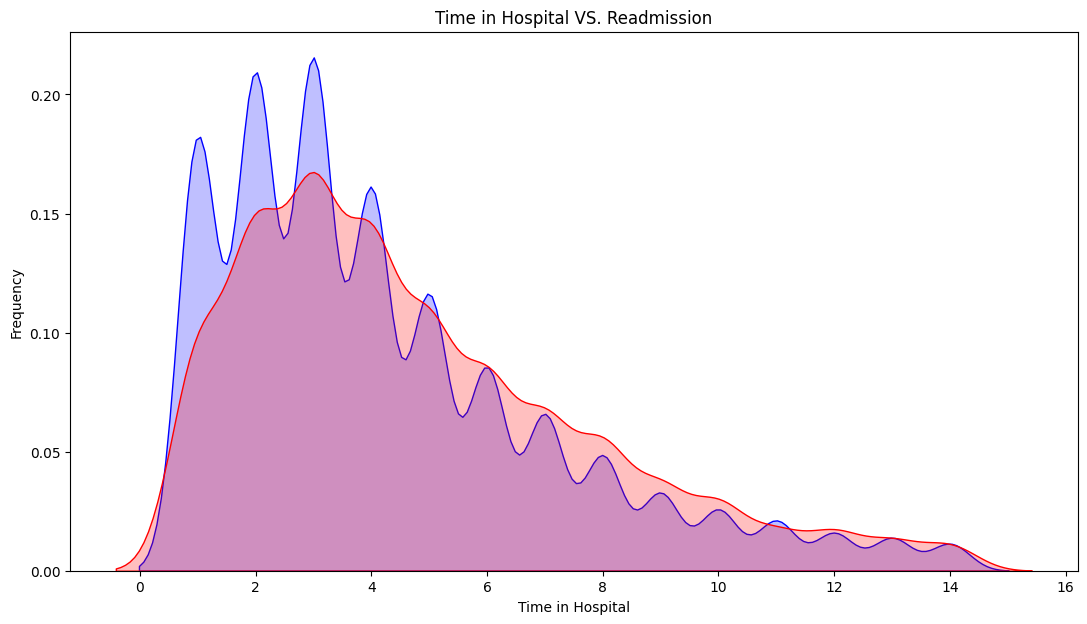

In [103]:
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

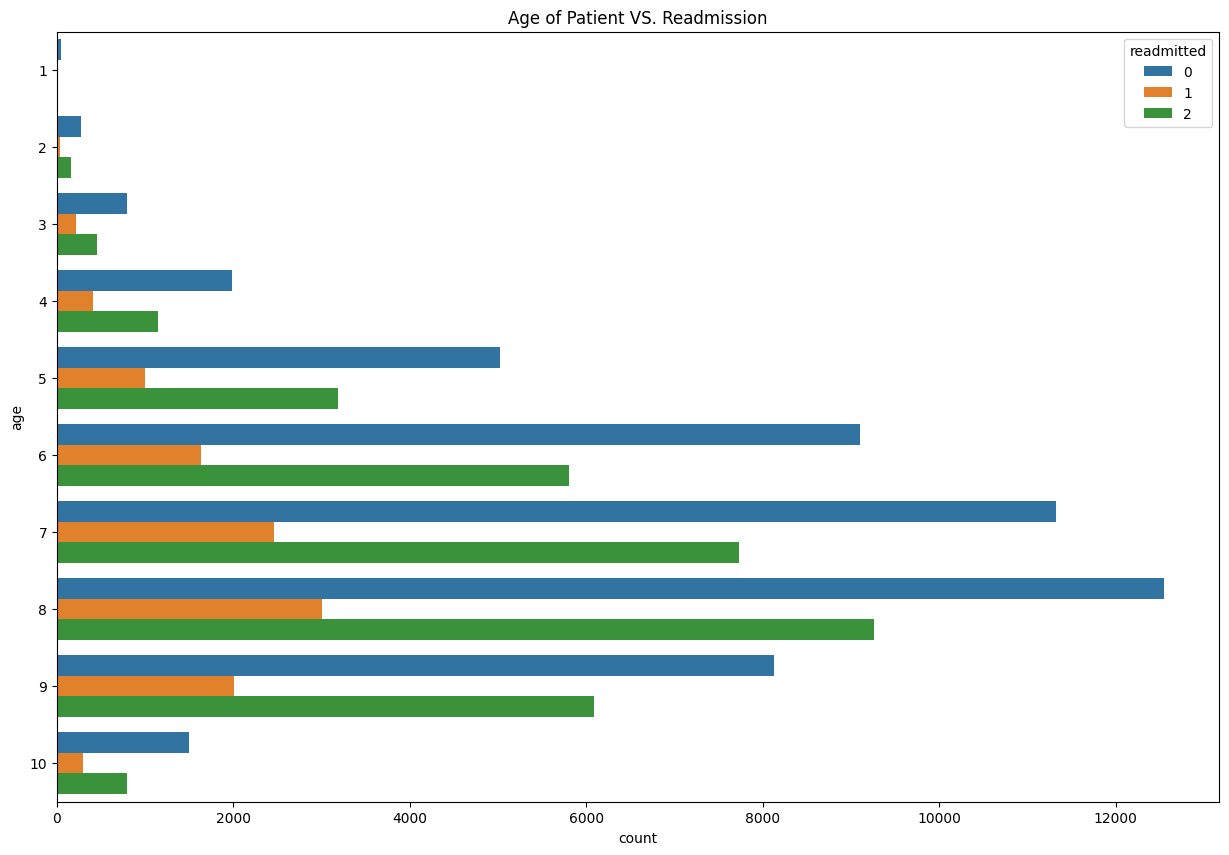

In [104]:
fig = plt.figure(figsize=(15,10))
sns.countplot(y= df['age'], hue = df['readmitted']).set_title('Age of Patient VS. Readmission')

<AxesSubplot:xlabel='count', ylabel='race'>

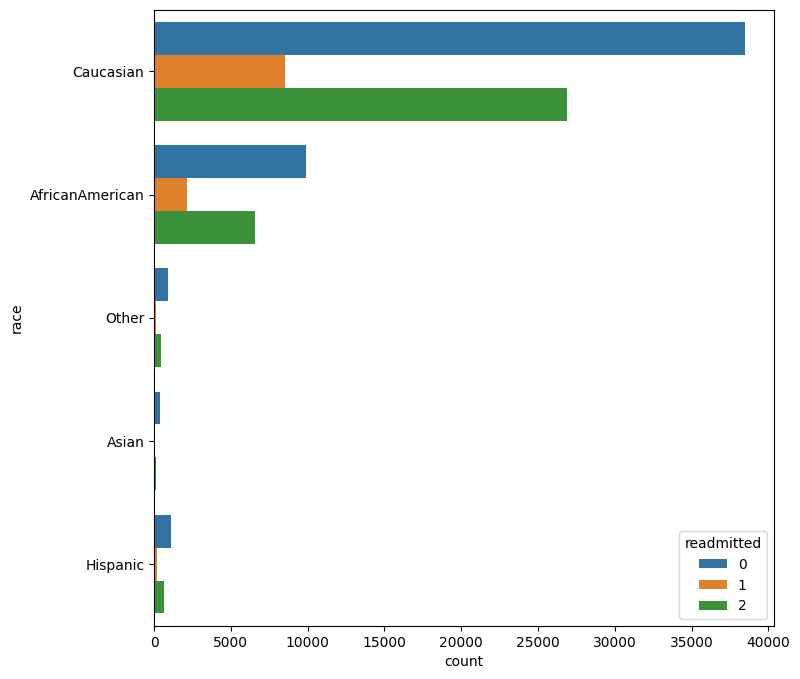

In [105]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y = df['race'], hue = df['readmitted'])

Text(0.5, 1.0, 'Number of medication used VS. Readmission')

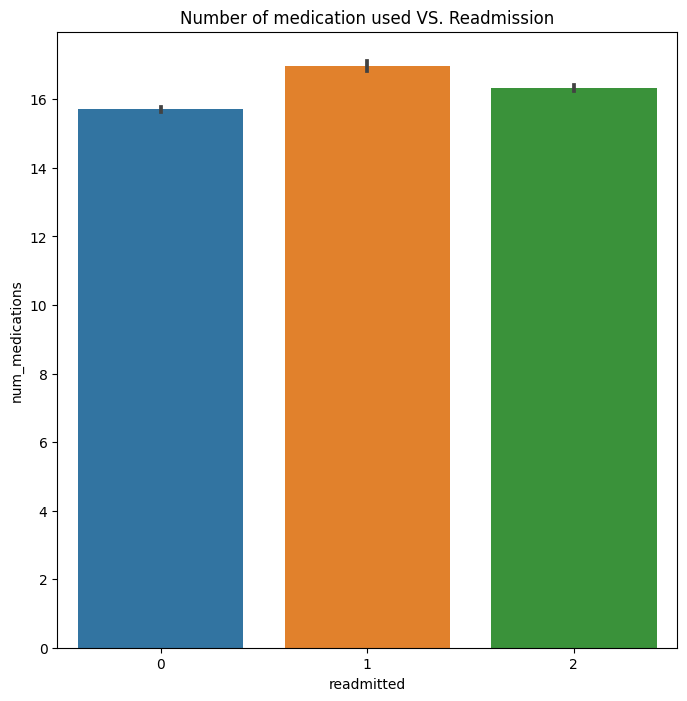

In [106]:
fig = plt.figure(figsize=(8,8))
sns.barplot(x = df['readmitted'], y = df['num_medications']).set_title("Number of medication used VS. Readmission")

In [107]:
df['age'] = df['age'].astype('int64')
print(df.age.value_counts())
# convert age categories to mid-point values
age_dict = {1:5, 2:15, 3:25, 4:35, 5:45, 6:55, 7:65, 8:75, 9:85, 10:95}
df['age'] = df.age.map(age_dict)
print(df.age.value_counts())

8     24815
7     21521
6     16546
9     16223
5      9208
4      3538
10     2594
3      1471
2       466
1        64
Name: age, dtype: int64
75    24815
65    21521
55    16546
85    16223
45     9208
35     3538
95     2594
25     1471
15      466
5        64
Name: age, dtype: int64


In [108]:
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,diabetesMed,readmitted,service_utilization,numchange,level1_diag1,level2_diag1,level1_diag2,level2_diag2,level1_diag3,level2_diag3
1,149190,55629189,Caucasian,0,15,1,1,7,3,59,...,1,2,0,1,0.0,20.0,4.0,14.0,0.0,20.0
2,64410,86047875,AfricanAmerican,0,25,1,1,7,2,11,...,1,0,3,0,0.0,0.0,4.0,14.0,0.0,0.0
3,500364,82442376,Caucasian,1,35,1,1,7,2,44,...,1,0,0,1,0.0,0.0,4.0,14.0,1.0,2.0
4,16680,42519267,Caucasian,1,45,1,1,7,1,51,...,1,0,0,0,8.0,19.0,8.0,19.0,4.0,14.0
5,35754,82637451,Caucasian,1,55,1,1,1,3,31,...,1,2,0,0,1.0,2.0,1.0,2.0,4.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,1,75,1,2,7,3,51,...,1,2,0,1,4.0,14.0,0.0,22.0,1.0,3.0
101762,443847782,74694222,AfricanAmerican,0,85,1,2,4,5,33,...,1,0,1,0,3.0,12.0,0.0,20.0,3.0,13.0
101763,443854148,41088789,Caucasian,1,75,1,1,7,1,53,...,1,0,1,1,0.0,0.0,7.0,17.0,0.0,22.0
101764,443857166,31693671,Caucasian,0,85,1,2,7,10,45,...,1,0,1,1,5.0,15.0,0.0,0.0,5.0,15.0


In [109]:
df['nummed'] = 0

for col in keys:
    df['nummed'] = df['nummed'] + df[col]
df['nummed'].value_counts()

1    44589
0    22156
2    20901
3     7448
4     1290
5       57
6        5
Name: nummed, dtype: int64

In [110]:
# get list of only numeric features
num_col = list(set(list(df._get_numeric_data().columns))- {'readmitted'})
num_col

['A1Cresult',
 'level2_diag1',
 'number_diagnoses',
 'insulin',
 'number_outpatient',
 'nateglinide',
 'acarbose',
 'level1_diag1',
 'pioglitazone',
 'level1_diag2',
 'glipizide',
 'admission_type_id',
 'patient_nbr',
 'change',
 'level2_diag2',
 'glyburide',
 'tolazamide',
 'repaglinide',
 'glimepiride-pioglitazone',
 'number_emergency',
 'miglitol',
 'service_utilization',
 'glipizide-metformin',
 'time_in_hospital',
 'tolbutamide',
 'num_lab_procedures',
 'admission_source_id',
 'metformin',
 'glyburide-metformin',
 'level2_diag3',
 'metformin-pioglitazone',
 'encounter_id',
 'chlorpropamide',
 'discharge_disposition_id',
 'metformin-rosiglitazone',
 'nummed',
 'glimepiride',
 'numchange',
 'num_medications',
 'level1_diag3',
 'num_procedures',
 'age',
 'diabetesMed',
 'troglitazone',
 'acetohexamide',
 'number_inpatient',
 'max_glu_serum',
 'rosiglitazone',
 'gender']

In [111]:
# Removing skewnewss and kurtosis using log transformation if it is above a threshold value -  2

statdataframe = pd.DataFrame()
statdataframe['numeric_column'] = num_col
skew_before = []
skew_after = []

kurt_before = []
kurt_after = []

standard_deviation_before = []
standard_deviation_after = []

log_transform_needed = []

log_type = []

for i in num_col:
    skewval = df[i].skew()
    skew_before.append(skewval)
    
    kurtval = df[i].kurtosis()
    kurt_before.append(kurtval)
    
    sdval = df[i].std()
    standard_deviation_before.append(sdval)
    
    if (abs(skewval) >2) & (abs(kurtval) >2):
        log_transform_needed.append('Yes')
        
        if len(df[df[i] == 0])/len(df) <=0.02:
            log_type.append('log')
            skewvalnew = np.log(pd.DataFrame(df[df[i] > 0])[i]).skew()
            skew_after.append(skewvalnew)
            
            kurtvalnew = np.log(pd.DataFrame(df[df[i] > 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)
            
            sdvalnew = np.log(pd.DataFrame(df[df[i] > 0])[i]).std()
            standard_deviation_after.append(sdvalnew)
            
        else:
            log_type.append('log1p')
            skewvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).skew()
            skew_after.append(skewvalnew)
        
            kurtvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)
            
            sdvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).std()
            standard_deviation_after.append(sdvalnew)
            
    else:
        log_type.append('NA')
        log_transform_needed.append('No')
        
        skew_after.append(skewval)
        kurt_after.append(kurtval)
        standard_deviation_after.append(sdval)

statdataframe['skew_before'] = skew_before
statdataframe['kurtosis_before'] = kurt_before
statdataframe['standard_deviation_before'] = standard_deviation_before
statdataframe['log_transform_needed'] = log_transform_needed
statdataframe['log_type'] = log_type
statdataframe['skew_after'] = skew_after
statdataframe['kurtosis_after'] = kurt_after
statdataframe['standard_deviation_after'] = standard_deviation_after

In [112]:
statdataframe

,numeric_column,skew_before,kurtosis_before,standard_deviation_before,log_transform_needed,log_type,skew_after,kurtosis_after,standard_deviation_after
0,A1Cresult,1.791122,1.208325,3.713715e+01,No,NA,1.791122,1.208325,3.713715e+01
1,level2_diag1,0.311029,-1.334546,6.847464e+00,No,NA,0.311029,-1.334546,6.847464e+00
2,number_diagnoses,-0.807741,-0.372558,1.836659e+00,No,NA,-0.807741,-0.372558,1.836659e+00
3,insulin,-0.123122,-1.984882,4.990579e-01,No,NA,-0.123122,-1.984882,4.990579e-01
4,number_outpatient,8.767489,146.244961,1.280061e+00,Yes,log1p,2.708627,7.648535,4.329489e-01
5,nateglinide,11.756734,136.223627,8.385467e-02,Yes,log1p,11.756734,136.223627,5.812363e-02
6,acarbose,17.906908,318.663977,5.550042e-02,Yes,log1p,17.906908,318.663977,3.846996e-02
7,level1_diag1,0.910145,-0.231382,2.258007e+00,No,NA,0.910145,-0.231382,2.258007e+00
8,pioglitazone,3.280165,8.759663,2.602985e-01,Yes,log1p,3.280165,8.759663,1.804252e-01
9,level1_diag2,1.107870,0.076299,2.314874e+00,No,NA,1.107870,0.076299,2.314874e+00


In [113]:
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,readmitted,service_utilization,numchange,level1_diag1,level2_diag1,level1_diag2,level2_diag2,level1_diag3,level2_diag3,nummed
1,149190,55629189,Caucasian,0,15,1,1,7,3,59,...,2,0,1,0.0,20.0,4.0,14.0,0.0,20.0,1
2,64410,86047875,AfricanAmerican,0,25,1,1,7,2,11,...,0,3,0,0.0,0.0,4.0,14.0,0.0,0.0,1
3,500364,82442376,Caucasian,1,35,1,1,7,2,44,...,0,0,1,0.0,0.0,4.0,14.0,1.0,2.0,1
4,16680,42519267,Caucasian,1,45,1,1,7,1,51,...,0,0,0,8.0,19.0,8.0,19.0,4.0,14.0,2
5,35754,82637451,Caucasian,1,55,1,1,1,3,31,...,2,0,0,1.0,2.0,1.0,2.0,4.0,14.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,1,75,1,2,7,3,51,...,2,0,1,4.0,14.0,0.0,22.0,1.0,3.0,2
101762,443847782,74694222,AfricanAmerican,0,85,1,2,4,5,33,...,0,1,0,3.0,12.0,0.0,20.0,3.0,13.0,1
101763,443854148,41088789,Caucasian,1,75,1,1,7,1,53,...,0,1,1,0.0,0.0,7.0,17.0,0.0,22.0,2
101764,443857166,31693671,Caucasian,0,85,1,2,7,10,45,...,0,1,1,5.0,15.0,0.0,0.0,5.0,15.0,3


In [114]:
# # performing the log transformation for the columns determined to be needing it above.

# for i in range(len(statdataframe)):
#     if statdataframe['log_transform_needed'][i] == 'Yes':
#         colname = str(statdataframe['numeric_column'][i])
        
#         if statdataframe['log_type'][i] == 'log':
#             df = df[df[colname] > 0]
#             df[colname + "_log"] = np.log(df[colname])
            
#         elif statdataframe['log_type'][i] == 'log1p':
#             df = df[df[colname] >= 0]
#             df[colname + "_log1p"] = np.log1p(df[colname])

In [115]:
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,readmitted,service_utilization,numchange,level1_diag1,level2_diag1,level1_diag2,level2_diag2,level1_diag3,level2_diag3,nummed
1,149190,55629189,Caucasian,0,15,1,1,7,3,59,...,2,0,1,0.0,20.0,4.0,14.0,0.0,20.0,1
2,64410,86047875,AfricanAmerican,0,25,1,1,7,2,11,...,0,3,0,0.0,0.0,4.0,14.0,0.0,0.0,1
3,500364,82442376,Caucasian,1,35,1,1,7,2,44,...,0,0,1,0.0,0.0,4.0,14.0,1.0,2.0,1
4,16680,42519267,Caucasian,1,45,1,1,7,1,51,...,0,0,0,8.0,19.0,8.0,19.0,4.0,14.0,2
5,35754,82637451,Caucasian,1,55,1,1,1,3,31,...,2,0,0,1.0,2.0,1.0,2.0,4.0,14.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,1,75,1,2,7,3,51,...,2,0,1,4.0,14.0,0.0,22.0,1.0,3.0,2
101762,443847782,74694222,AfricanAmerican,0,85,1,2,4,5,33,...,0,1,0,3.0,12.0,0.0,20.0,3.0,13.0,1
101763,443854148,41088789,Caucasian,1,75,1,1,7,1,53,...,0,1,1,0.0,0.0,7.0,17.0,0.0,22.0,2
101764,443857166,31693671,Caucasian,0,85,1,2,7,10,45,...,0,1,1,5.0,15.0,0.0,0.0,5.0,15.0,3


In [116]:
df.shape

(96446, 54)

In [117]:
# get list of only numeric features
numerics = list(set(list(df._get_numeric_data().columns))- {'readmitted','level1_diag2'})
numerics

['A1Cresult',
 'level2_diag1',
 'number_diagnoses',
 'insulin',
 'number_outpatient',
 'nateglinide',
 'acarbose',
 'level1_diag1',
 'pioglitazone',
 'glipizide',
 'admission_type_id',
 'patient_nbr',
 'change',
 'level2_diag2',
 'glyburide',
 'tolazamide',
 'repaglinide',
 'glimepiride-pioglitazone',
 'number_emergency',
 'miglitol',
 'service_utilization',
 'glipizide-metformin',
 'time_in_hospital',
 'tolbutamide',
 'num_lab_procedures',
 'admission_source_id',
 'metformin',
 'glyburide-metformin',
 'level2_diag3',
 'metformin-pioglitazone',
 'encounter_id',
 'chlorpropamide',
 'discharge_disposition_id',
 'metformin-rosiglitazone',
 'nummed',
 'glimepiride',
 'numchange',
 'num_medications',
 'level1_diag3',
 'num_procedures',
 'age',
 'diabetesMed',
 'troglitazone',
 'acetohexamide',
 'number_inpatient',
 'max_glu_serum',
 'rosiglitazone',
 'gender']

In [118]:
# show list of features that are categorical
df.encounter_id = df.encounter_id.astype('int64')
df.patient_nbr = df.patient_nbr.astype('int64')
df.diabetesMed = df.diabetesMed.astype('int64')
df.change = df.change.astype('int64')

# convert data type of nominal features in dataframe to 'object' type for aggregating
i = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', \
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', \
          'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', \
          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone','A1Cresult']
df[i] = df[i].astype('int64')

df.dtypes

encounter_id                  int64
patient_nbr                   int64
race                         object
gender                        int64
age                           int64
admission_type_id             int64
discharge_disposition_id      int64
admission_source_id           int64
time_in_hospital              int64
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient              int64
diag_1                       object
diag_2                       object
diag_3                       object
number_diagnoses              int64
max_glu_serum                 int64
A1Cresult                     int64
metformin                     int64
repaglinide                   int64
nateglinide                   int64
chlorpropamide                int64
glimepiride                   int64
acetohexamide                 int64
glipizide                   

In [119]:
dfcopy = df.copy(deep = True)
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,readmitted,service_utilization,numchange,level1_diag1,level2_diag1,level1_diag2,level2_diag2,level1_diag3,level2_diag3,nummed
1,149190,55629189,Caucasian,0,15,1,1,7,3,59,...,2,0,1,0.0,20.0,4.0,14.0,0.0,20.0,1
2,64410,86047875,AfricanAmerican,0,25,1,1,7,2,11,...,0,3,0,0.0,0.0,4.0,14.0,0.0,0.0,1
3,500364,82442376,Caucasian,1,35,1,1,7,2,44,...,0,0,1,0.0,0.0,4.0,14.0,1.0,2.0,1
4,16680,42519267,Caucasian,1,45,1,1,7,1,51,...,0,0,0,8.0,19.0,8.0,19.0,4.0,14.0,2
5,35754,82637451,Caucasian,1,55,1,1,1,3,31,...,2,0,0,1.0,2.0,1.0,2.0,4.0,14.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,1,75,1,2,7,3,51,...,2,0,1,4.0,14.0,0.0,22.0,1.0,3.0,2
101762,443847782,74694222,AfricanAmerican,0,85,1,2,4,5,33,...,0,1,0,3.0,12.0,0.0,20.0,3.0,13.0,1
101763,443854148,41088789,Caucasian,1,75,1,1,7,1,53,...,0,1,1,0.0,0.0,7.0,17.0,0.0,22.0,2
101764,443857166,31693671,Caucasian,0,85,1,2,7,10,45,...,0,1,1,5.0,15.0,0.0,0.0,5.0,15.0,3


In [120]:
#df['readmitted'] = df['readmitted'].apply(lambda x: 0 if x == 2 else x)
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,readmitted,service_utilization,numchange,level1_diag1,level2_diag1,level1_diag2,level2_diag2,level1_diag3,level2_diag3,nummed
1,149190,55629189,Caucasian,0,15,1,1,7,3,59,...,2,0,1,0.0,20.0,4.0,14.0,0.0,20.0,1
2,64410,86047875,AfricanAmerican,0,25,1,1,7,2,11,...,0,3,0,0.0,0.0,4.0,14.0,0.0,0.0,1
3,500364,82442376,Caucasian,1,35,1,1,7,2,44,...,0,0,1,0.0,0.0,4.0,14.0,1.0,2.0,1
4,16680,42519267,Caucasian,1,45,1,1,7,1,51,...,0,0,0,8.0,19.0,8.0,19.0,4.0,14.0,2
5,35754,82637451,Caucasian,1,55,1,1,1,3,31,...,2,0,0,1.0,2.0,1.0,2.0,4.0,14.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,1,75,1,2,7,3,51,...,2,0,1,4.0,14.0,0.0,22.0,1.0,3.0,2
101762,443847782,74694222,AfricanAmerican,0,85,1,2,4,5,33,...,0,1,0,3.0,12.0,0.0,20.0,3.0,13.0,1
101763,443854148,41088789,Caucasian,1,75,1,1,7,1,53,...,0,1,1,0.0,0.0,7.0,17.0,0.0,22.0,2
101764,443857166,31693671,Caucasian,0,85,1,2,7,10,45,...,0,1,1,5.0,15.0,0.0,0.0,5.0,15.0,3


In [121]:
# drop individual diagnosis columns that have too granular disease information
# also drop level 2 categorization (which was not comparable with any reference)
# also drop level 1 secondary and tertiary diagnoses
df.drop(['diag_1', 'diag_2', 'diag_3', 'level2_diag1', 'level1_diag2', 'level2_diag2', 'level1_diag3',
         'level2_diag3'], axis=1, inplace=True)

In [122]:
interactionterms = [('num_medications','time_in_hospital'),
('num_medications','num_procedures'),
('time_in_hospital','num_lab_procedures'),
('num_medications','num_lab_procedures'),
('num_medications','number_diagnoses'),
('age','number_diagnoses'),
('change','num_medications'),
('number_diagnoses','time_in_hospital'),
('num_medications','numchange')]

In [123]:
for inter in interactionterms:
    name = inter[0] + '|' + inter[1]
    df[name] = df[inter[0]] * df[inter[1]]

In [124]:
df[['num_medications','time_in_hospital', 'num_medications|time_in_hospital']].head()

,num_medications,time_in_hospital,num_medications|time_in_hospital
1,18,3,54
2,13,2,26
3,16,2,32
4,8,1,8
5,16,3,48


In [125]:
# dropping multiple encounters while keeping either first or last encounter of these patients
df2 = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
df2.shape

(67580, 55)

In [126]:
from matplotlib.colors import ListedColormap
my_cmap = ListedColormap(sns.light_palette((250, 100, 50), input="husl", n_colors=50).as_hex())
table = df2.drop(['patient_nbr', 'encounter_id'], axis=1).corr(method='pearson')
table.style.background_gradient(cmap=my_cmap, axis = 0)

C:\Users\adith\AppData\Local\Temp\ipykernel_31988\3947869437.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  table = df2.drop(['patient_nbr', 'encounter_id'], axis=1).corr(method='pearson')
c:\Users\adith\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\formats\style.py:3925: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
c:\Users\adith\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\formats\style.py:3926: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,service_utilization,numchange,level1_diag1,nummed,num_medications|time_in_hospital,num_medications|num_procedures,time_in_hospital|num_lab_procedures,num_medications|num_lab_procedures,num_medications|number_diagnoses,age|number_diagnoses,change|num_medications,number_diagnoses|time_in_hospital,num_medications|numchange
gender,1.000000,-0.052934,0.010019,0.000786,-0.000683,-0.024032,0.006051,0.069139,-0.012526,-0.015660,-0.019629,-0.001937,0.000646,-0.001898,0.021714,0.003411,-0.002110,-0.004525,0.003056,-0.001246,-0.003598,0.029513,0.034325,0.001028,0.010884,0.013085,0.008021,0.001150,0.007123,0.005733,0.000750,0.001120,0.005052,nan,nan,-0.003598,0.019440,0.018537,-0.017097,-0.019513,0.013297,-0.025801,0.030230,-0.008895,0.054291,-0.009055,0.004393,-0.008734,-0.033502,0.014320,-0.020309,0.015583
age,-0.052934,1.000000,-0.006456,0.015191,0.043386,0.117195,0.022551,-0.039654,0.030620,0.022762,-0.051692,0.010046,0.210627,0.042316,-0.105924,-0.066466,0.040702,0.015692,0.015319,0.034686,0.002256,0.048917,0.078395,0.010877,0.011379,-0.000155,0.011235,0.008435,-0.001793,0.006808,-0.081075,-0.002443,0.002237,nan,nan,-0.000212,-0.041148,-0.019858,0.056900,0.002704,-0.068453,-0.004960,-0.009093,0.066648,-0.027905,0.087184,0.027166,0.087712,0.742362,-0.014766,0.155708,-0.037455
admission_type_id,0.010019,-0.006456,1.000000,0.082137,-0.172369,-0.027972,-0.133910,0.121913,0.116964,0.049109,-0.014980,0.024666,-0.111559,0.400973,-0.072771,0.013890,-0.014482,-0.010924,0.010245,-0.012173,-0.002380,0.010170,0.000853,0.004474,0.010094,0.009717,0.007853,-0.001882,0.002341,0.010679,-0.043581,-0.006071,-0.002065,nan,nan,0.003217,-0.002843,-0.009499,0.010583,0.041653,0.005186,0.079242,-0.012875,0.026379,0.112682,-0.071043,-0.005694,0.044740,-0.086620,0.044907,-0.061037,0.028423
discharge_disposition_id,0.000786,0.015191,0.082137,1.000000,-0.009532,0.057735,0.001924,0.017339,0.010159,-0.039951,-0.033493,-0.041916,-0.055220,0.019493,0.002343,-0.004644,-0.014171,-0.018783,0.029613,-0.027894,-0.000073,-0.019115,0.066091,-0.002878,-0.027497,-0.012339,0.012945,0.000365,0.009420,0.008597,-0.096121,-0.014670,-0.000194,nan,nan,-0.000073,-0.049516,-0.053827,-0.026801,-0.059464,-0.029866,-0.006942,-0.058044,0.041129,0.030638,0.039620,0.001966,-0.016644,-0.029145,-0.035566,0.034167,-0.024889
admission_source_id,-0.000683,0.043386,-0.172369,-0.009532,1.000000,0.018264,0.185889,-0.191248,-0.109921,-0.007670,0.060528,0.030257,0.105279,0.231877,0.068882,-0.029637,0.007763,-0.012555,-0.002832,-0.021273,0.002614,0.006970,-0.001119,0.001585,-0.012959,-0.017472,0.000363,-0.000947,0.004528,0.001910,0.023807,-0.013534,0.000955,nan,nan,-0.005272,0.006574,0.000523,0.055392,0.028729,0.034181,-0.119796,-0.012757,-0.029673,-0.152867,0.082848,0.036895,-0.040723,0.104257,-0.043820,0.046310,-0.001856
time_in_hospital,-0.024032,0.117195,-0.027972,0.057735,0.018264,1.000000,0.331327,0.186547,0.465606,-0.018380,-0.010292,0.061576,0.224597,0.012902,0.077362,-0.004890,0.031373,0.006506,0.001714,0.014746,0.012643,0.020465,0.030489,0.002290,0.004280,0.004464,0.006717,-0.002693,0.004570,-0.005604,0.110359,-0.000305,0.001391,nan,nan,0.002204,0.111134,0.068988,0.046275,0.008632,0.170019,0.005111,0.084417,0.830857,0.319449,0.860812,0.515463,0.479395,0.220826,0.273178,0.943263,0.268011
num_lab_procedures,0.006051,0.022551,-0.133910,0.001924,0.185889,0.331327,1.000000,0.044017,0.258746,-0.009586,0.014900,0.078032,0.152297,-0.133768,0.273536

In [127]:
df2['level1_diag1'] = df2['level1_diag1'].astype('object')
df_pd = pd.get_dummies(df2, columns=['gender', 'admission_type_id', 'discharge_disposition_id',
                                      'admission_source_id', 'max_glu_serum', 'A1Cresult', 'level1_diag1'], drop_first = True)
just_dummies = pd.get_dummies(df_pd['race'])
df_pd = pd.concat([df_pd, just_dummies], axis=1)      
df_pd.drop(['race'], inplace=True, axis=1)

C:\Users\adith\AppData\Local\Temp\ipykernel_31988\913739909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['level1_diag1'] = df2['level1_diag1'].astype('object')
C:\Users\adith\AppData\Local\Temp\ipykernel_31988\913739909.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_pd = pd.get_dummies(df2, columns=['gender', 'admission_type_id', 'discharge_disposition_id',


In [128]:
non_num_cols = ['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'max_glu_serum', 'A1Cresult', 'level1_diag1' ]

In [129]:
num_cols = list(set(list(df._get_numeric_data().columns))- {'readmitted', 'change'})
num_cols

['A1Cresult',
 'num_medications|num_lab_procedures',
 'number_diagnoses',
 'insulin',
 'number_outpatient',
 'nateglinide',
 'acarbose',
 'age|number_diagnoses',
 'level1_diag1',
 'pioglitazone',
 'num_medications|numchange',
 'glipizide',
 'admission_type_id',
 'patient_nbr',
 'glyburide',
 'tolazamide',
 'num_medications|number_diagnoses',
 'repaglinide',
 'glimepiride-pioglitazone',
 'change|num_medications',
 'number_emergency',
 'miglitol',
 'service_utilization',
 'glipizide-metformin',
 'time_in_hospital',
 'num_medications|num_procedures',
 'tolbutamide',
 'num_lab_procedures',
 'admission_source_id',
 'metformin',
 'time_in_hospital|num_lab_procedures',
 'glyburide-metformin',
 'metformin-pioglitazone',
 'encounter_id',
 'num_medications|time_in_hospital',
 'chlorpropamide',
 'discharge_disposition_id',
 'metformin-rosiglitazone',
 'nummed',
 'glimepiride',
 'numchange',
 'num_medications',
 'number_diagnoses|time_in_hospital',
 'num_procedures',
 'age',
 'diabetesMed',
 'trog

In [130]:
new_non_num_cols = []
for i in non_num_cols:
    for j in df_pd.columns:
        if i in j:
            new_non_num_cols.append(j)

In [131]:
new_non_num_cols

['gender_1',
 'admission_type_id_3',
 'admission_type_id_4',
 'admission_type_id_5',
 'discharge_disposition_id_2',
 'discharge_disposition_id_7',
 'discharge_disposition_id_10',
 'discharge_disposition_id_18',
 'discharge_disposition_id_19',
 'discharge_disposition_id_20',
 'discharge_disposition_id_27',
 'discharge_disposition_id_28',
 'admission_source_id_4',
 'admission_source_id_7',
 'admission_source_id_8',
 'admission_source_id_9',
 'admission_source_id_11',
 'max_glu_serum_0',
 'max_glu_serum_1',
 'A1Cresult_0',
 'A1Cresult_1',
 'level1_diag1_1.0',
 'level1_diag1_2.0',
 'level1_diag1_3.0',
 'level1_diag1_4.0',
 'level1_diag1_5.0',
 'level1_diag1_6.0',
 'level1_diag1_7.0',
 'level1_diag1_8.0']

In [132]:
l = []
for feature in list(df_pd.columns):
    if '|' in feature:
        l.append(feature)
l

['num_medications|time_in_hospital',
 'num_medications|num_procedures',
 'time_in_hospital|num_lab_procedures',
 'num_medications|num_lab_procedures',
 'num_medications|number_diagnoses',
 'age|number_diagnoses',
 'change|num_medications',
 'number_diagnoses|time_in_hospital',
 'num_medications|numchange']

In [133]:
df_pd.head().T

,1,2,3,4,5
encounter_id,149190,64410,500364,16680,35754
patient_nbr,55629189,86047875,82442376,42519267,82637451
age,15,25,35,45,55
time_in_hospital,3,2,2,1,3
num_lab_procedures,59,11,44,51,31
...,...,...,...,...,...
AfricanAmerican,0,1,0,0,0
Asian,0,0,0,0,0
Caucasian,1,0,1,1,1
Hispanic,0,0,0,0,0


In [134]:
feature_set = ['age', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_diagnoses', 'metformin', 
                 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
                 'pioglitazone', 'rosiglitazone', 'acarbose', 'tolazamide', 'insulin', 'glyburide-metformin',
                 'AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other', 'gender_1', 
                 'admission_type_id_3', 'admission_type_id_5', 'discharge_disposition_id_2', 'discharge_disposition_id_7', 
                 'discharge_disposition_id_10', 'discharge_disposition_id_18', 'admission_source_id_4',
                 'admission_source_id_7', 'admission_source_id_9', 'max_glu_serum_0', 'max_glu_serum_1', 'A1Cresult_0',
                 'A1Cresult_1', 'num_medications|time_in_hospital', 'num_medications|num_procedures',
                 'time_in_hospital|num_lab_procedures', 'num_medications|num_lab_procedures', 'num_medications|number_diagnoses',
                 'age|number_diagnoses', 'change|num_medications', 'number_diagnoses|time_in_hospital',
                 'num_medications|numchange', 'level1_diag1_1.0', 'level1_diag1_2.0', 'level1_diag1_3.0', 'level1_diag1_4.0',
                 'level1_diag1_5.0','level1_diag1_6.0', 'level1_diag1_7.0', 'level1_diag1_8.0']

In [135]:
X = df_pd[feature_set]
y = df_pd['readmitted']

In [136]:
df_pd['readmitted'].value_counts()

0    39826
2    21625
1     6129
Name: readmitted, dtype: int64

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
logit = LogisticRegression(C=1, penalty='l1', solver='liblinear')
logit.fit(X_train, y_train)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [138]:
logit_pred = logit.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(logit_pred, name = 'Predict'), margins = True)

Predict,0,1,2,All
Actual,,,,
0,1013,2,47,1062
1,193,0,6,199
2,673,0,45,718
All,1879,2,98,1979


In [139]:
"""from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, logit_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, logit_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, logit_pred)))"""

'from sklearn.metrics import accuracy_score, precision_score, recall_score\nprint("Accuracy is {0:.2f}".format(accuracy_score(y_test, logit_pred)))\nprint("Precision is {0:.2f}".format(precision_score(y_test, logit_pred)))\nprint("Recall is {0:.2f}".format(recall_score(y_test, logit_pred)))'

In [140]:
df_pd.to_csv('./content/processedNew.csv')

In [141]:
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,nummed,num_medications|time_in_hospital,num_medications|num_procedures,time_in_hospital|num_lab_procedures,num_medications|num_lab_procedures,num_medications|number_diagnoses,age|number_diagnoses,change|num_medications,number_diagnoses|time_in_hospital,num_medications|numchange
1,149190,55629189,Caucasian,0,15,1,1,7,3,59,...,1,54,0,177,1062,162,135,18,27,18
2,64410,86047875,AfricanAmerican,0,25,1,1,7,2,11,...,1,26,65,22,143,78,150,0,12,0
3,500364,82442376,Caucasian,1,35,1,1,7,2,44,...,1,32,16,88,704,112,245,16,14,16
4,16680,42519267,Caucasian,1,45,1,1,7,1,51,...,2,8,0,51,408,40,225,8,5,0
5,35754,82637451,Caucasian,1,55,1,1,1,3,31,...,1,48,96,93,496,144,495,0,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,1,75,1,2,7,3,51,...,2,48,0,153,816,144,675,16,27,16
101762,443847782,74694222,AfricanAmerican,0,85,1,2,4,5,33,...,1,90,54,165,594,162,765,0,45,0
101763,443854148,41088789,Caucasian,1,75,1,1,7,1,53,...,2,9,0,53,477,117,975,9,13,9
101764,443857166,31693671,Caucasian,0,85,1,2,7,10,45,...,3,210,42,450,945,189,765,21,90,21


In [145]:
df_pd['readmitted'] = df['readmitted'].apply(lambda x: 0 if x == 2 else x)

In [146]:
df_pd.to_csv('./content/processedBinary.csv')

In [147]:
df_pd['readmitted']

1         0
2         0
3         0
4         0
5         0
         ..
101754    0
101755    0
101756    0
101758    0
101765    0
Name: readmitted, Length: 67580, dtype: int64